# Classificação por Regras Pré-Definidas

O problema com o qual vamos lidar é o de classificar automaticamente elementos de um conjunto através de suas características mensuráveis. Trata-se, assim, do problema de *observar* elementos e, através dessas observações, *inferir* qual é a *classe* à qual o elemento pertence. Neste caderno, iremos utilizar um processo de inferência baseado em regras pré-definidas.

# Objetivos

Ao final desta iteração, o estudante será capaz de:
* Entender a relevância de características adequadas em conjuntos de dados
* Analisar a relevância de características de dados usando *scatter plots* e histograma
* Entender o conceito de *fronteira de decisão*
* Construir regras para classificação à partir da análise manual de dados
* Otimizar parâmetros de regras usando busca exaustiva


In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

# Conjunto de dados

No nosso estudo de caso, verificaremos se é possível identificar o esporte que um jogador pratica observando apenas suas características físicas. Para isso, utilizaremos dados reais de altura e peso dos jogadores das seleções brasileiras de [futebol](http://tnh1.ne10.uol.com.br/noticia/esporte/2014/05/07/298773/confira-quem-sao-e-a-ficha-tecnica-completa-dos-convocados-por-felipao) e [vôlei](http://www.cbv.com.br/v1/ligamundial/infobrasil.asp). Os dados estão num arquivo [CSV](https://en.wikipedia.org/wiki/Comma-separated_values), que pode ser carregado para uma variável de ambiente para nossa simulação.

In [2]:
import csv
with open("biometria.csv", 'rb') as f:
    dados = list(csv.reader(f))

for d in dados:
    print d

['Esporte', 'Altura (m)', 'Peso (kg)']
['V', '1.9', '76']
['V', '1.98', '70']
['V', '2.04', '101']
['V', '1.88', '77']
['V', '2.14', '109']
['V', '2.05', '84']
['V', '1.96', '89']
['V', '2.09', '101']
['V', '1.95', '79']
['V', '1.95', '83']
['V', '1.92', '91']
['V', '1.99', '99']
['V', '2.09', '93']
['V', '1.9', '76']
['V', '1.94', '76']
['V', '2.06', '93']
['V', '1.9', '82']
['V', '2.03', '90']
['V', '1.99', '80']
['V', '2.12', '97']
['V', '1.98', '87']
['V', '1.85', '78']
['F', '1.86', '80']
['F', '1.88', '80']
['F', '1.93', '88']
['F', '1.73', '65']
['F', '1.84', '79']
['F', '1.73', '72']
['F', '1.77', '79']
['F', '1.83', '79']
['F', '1.89', '84']
['F', '1.88', '78']
['F', '1.87', '76']
['F', '1.87', '78']
['F', '1.8', '69']
['F', '1.81', '72']
['F', '1.76', '67']
['F', '1.8', '75']
['F', '1.74', '70']
['F', '1.8', '67']
['F', '1.74', '62']
['F', '1.8', '85']
['F', '1.63', '60']
['F', '1.85', '84']
['F', '1.9', '76']


# Visualizando dados

Cada um dos elementos do conjunto de dados é caracterizado por três valores: o esporte que pratica (**F**utebol ou **V**ôlei), sua altura e seu peso. Visualizar todos esses dados na forma de uma tabela, porém, é claramente pouco prático. Podemos imaginar como conjuntos de dados ainda maiores se comportariam - uma tabela com jogadores de futebol e vôlei de todos os países que participam do campeonato mundial, por exemplo, seria obviamente muito grande para ser analisada na forma de números.

Uma forma bastante comum de visualização de dados é o *scatter plot*. Trata-se de um tipo de figura na qual os pontos de um conjunto são colocados em uma figura. Utilizaremos cores para identificar o esporte relacionado a cada um dos pontos de dados.

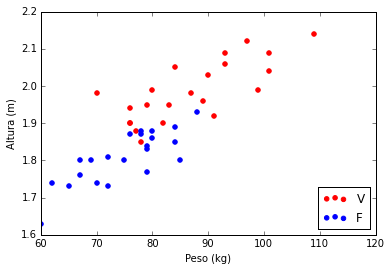

In [3]:
# Separando os dados em arrays do numpy
rotulos_volei = [d[0] for d in dados[1:-1] if d[0] is 'V']
rotulos_futebol = [d[0] for d in dados[1:-1] if d[0] is 'F']
altura_volei = np.array([float(d[1]) for d in dados[1:-1] if d[0] is 'V'])
altura_futebol = np.array([float(d[1]) for d in dados[1:-1] if d[0] is 'F'])
peso_volei = np.array([float(d[2]) for d in dados[1:-1] if d[0] is 'V'])
peso_futebol = np.array([float(d[2]) for d in dados[1:-1] if d[0] is 'F'])

plt.figure();
plt.scatter(peso_volei, altura_volei, color='red');
plt.scatter(peso_futebol, altura_futebol, color='blue');
plt.ylabel('Altura (m)');
plt.xlabel('Peso (kg)');
plt.xlim([60, 120]);
plt.ylim([1.6, 2.2]);
plt.legend(['V', 'F'], loc=4);

O *scatter plot* nos permite verificar a relevância de cada uma das características que medimos para o problema de classificação em questão. Observando a distribuição dos dados no eixo vertical, verificamos que jogadores de vôlei, quase sempre, são **mais altos** que os jogadores de futebol. Observando a distribuição de dados no eixo horizontal, verificamos que jogadores futebol tendem a ser mais leves que os jogadores de vôlei, mas não há uma divisão tão clara quanto no caso da altura.

Isso nos indica que poderíamos escolher um limiar de altura acima do qual um jogador seria classificado como um jogador de vôlei, e, consequentemente, abaixo do qual ele seria classificado como jogador de futebol. Implementei o classificador como uma função que recebe como entrada um valor de limiar e um conjunto de dados, e retorna os rótulos que devem ser associados a cada um dos pontos desse conjunto. A função aplica a regra do limiar a cada um dos elementos do vetor de dados recebido na entrada.

In [4]:
def classificador_limiar(limiar, dados, rotulos=('V', 'F')):
    ans = []
    for i in xrange(len(dados)):
        if dados[i] > limiar:
            ans.append(rotulos[0])
        else:
            ans.append(rotulos[1])
            
    return ans

print "Exemplo: ", classificador_limiar(1.9, [1.99, 1.9, 1.89, 1.3, 2.1])

Exemplo:  ['V', 'F', 'F', 'F', 'V']


A escolha de um limiar de classificação pode ser interpretada como a divisão do espaço definido pelas características observadas em partições, sendo que cada uma corresponde a uma classe. Se escolhermos um limiar de 1.90 m para a decisão, observaremos o seguinte particionamento:

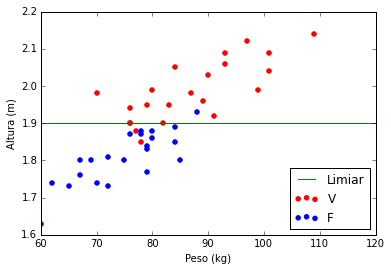

In [5]:
plt.figure();
plt.scatter(peso_volei, altura_volei, color='red');
plt.scatter(peso_futebol, altura_futebol, color='blue');
plt.plot([60, 120], [1.9, 1.9], color='green', lw=1)
plt.ylabel('Altura (m)');
plt.xlabel('Peso (kg)');
plt.xlim([60, 120]);
plt.ylim([1.6, 2.2]);
plt.legend(['Limiar', 'V', 'F'], loc=4);

# Aplicando a regra de decisão

Chega então o momento de aplicar, de fato, a regra de decisão aos dados de nosso conjunto. Após essa aplicação, poderemos comparar o resultado da classificação automática com o gabarito (*ground-truth*), o que nos permite contar erros e acertos. Em especial, nos interessa contar erros e acertos separadamente para cada classe de jogadores.

In [6]:
def comparar_resultados(resultado, gabarito):
    acertos = 0
    erros = 0
    for i in range(len(resultado)):
        if resultado[i] == gabarito[i]:
            acertos += 1
        else:
            erros += 1
            
    return acertos, erros

In [7]:
# Executar classificacao
classificacao_volei = classificador_limiar(1.9, altura_volei)
classificacao_futebol = classificador_limiar(1.9, altura_futebol)

# Comparar resultados com gabarito
resultados_volei = comparar_resultados(classificacao_volei, rotulos_volei)
resultados_futebol = comparar_resultados(classificacao_futebol, rotulos_futebol)

# Mostrar resultados
print "Volei: ", resultados_volei
print "Futebol:", resultados_futebol


Volei:  (17, 5)
Futebol: (21, 1)


Um resultado bastante interessante desta execução é que, embora as figuras de *scatter plot* tenham mostrado apenas quatro jogadores de vôlei próximos à fronteira de decisão (e, portanto, sujeitos a erros), o sistema de avaliação acusou cinco erros na classificação. Isso aconteceu porque alguns pontos foram sobrepostos ao serem desenhados na imagem. Uma possível maneira de contornar esse problema é adicionando um pequeno ruído aleatório à posição de cada um dos pontos, evidenciando os elementos ocultos.

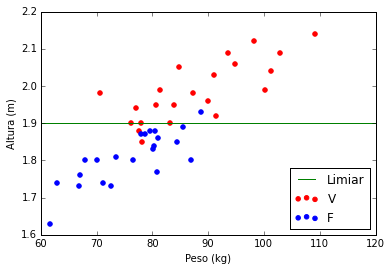

In [8]:
plt.figure();
plt.scatter(peso_volei + 2*np.random.random(peso_volei.shape), altura_volei, color='red');
plt.scatter(peso_futebol + 2*np.random.random(peso_futebol.shape), altura_futebol, color='blue');
plt.plot([60, 120], [1.9, 1.9], color='green', lw=1)
plt.ylabel('Altura (m)');
plt.xlabel('Peso (kg)');
plt.xlim([60, 120]);
plt.ylim([1.6, 2.2]);
plt.legend(['Limiar', 'V', 'F'], loc=4);

Esse procedimento evidencia caracteríticas que poderiam ficar ocultas no conjunto de dados. Porém, se aplicado em excesso, pode tornar a representação menos precisa. Uma ferramenta de análise de dados que permite verificar quantos pontos estão em cada posição é o histograma.

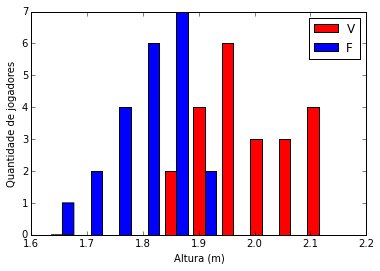

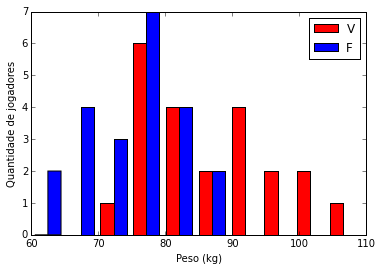

In [9]:
plt.figure();
plt.hist([altura_volei, altura_futebol], 10, normed=0, histtype='bar',
                            color=['red', 'blue'],
                            label=['V', 'F']);
plt.xlabel('Altura (m)');
plt.ylabel('Quantidade de jogadores');
plt.legend(loc=1);

plt.figure();
plt.hist([peso_volei, peso_futebol], 10, normed=0, histtype='bar',
                            color=['red', 'blue'],
                            label=['V', 'F']);
plt.xlabel('Peso (kg)');
plt.ylabel('Quantidade de jogadores');
plt.legend(loc=1);

O histograma traz uma representação mais clara do comportamento dos dados, evidenciando a frequência de ocorrência de cada faixa de valores em cada dimensão. Porém, ao mesmo tempo, não evidencia as correlações entre variáveis. De qualquer forma, trata-se de uma ferramenta importante para verificar quais características são relevantes no processo de classificação.



# Otimizando o processo de classificação

Não temos, neste momento, nenhum motivo para crer que nosso limiar inicial - 1.9m - seja o melhor possível (ou: o ótimo) para realizar a classificação automática a que nos propusemos. No trecho de código abaixo, é possível variar o valor do limiar e então visualizar a fronteira de decisão e o número total de acertos do processo de classificação. **Antes de prosseguir, experimente alguns valores para o limiar e tente otimizar o número de acertos do sistema**.

In [1]:
limiar = 2.35

# Executar classificacao
classificacao_volei = classificador_limiar(limiar, altura_volei)
classificacao_futebol = classificador_limiar(limiar, altura_futebol)

# Comparar resultados com gabarito
resultados_volei = comparar_resultados(classificacao_volei, rotulos_volei)
resultados_futebol = comparar_resultados(classificacao_futebol, rotulos_futebol)

# Mostrar resultados e limiar de classificação
plt.figure();
plt.scatter(peso_volei + 2*np.random.random(peso_volei.shape), altura_volei, color='red');
plt.scatter(peso_futebol + 2*np.random.random(peso_futebol.shape), altura_futebol, color='blue');
plt.plot([60, 120], [limiar, limiar], color='green', lw=1)
plt.ylabel('Altura (m)');
plt.xlabel('Peso (kg)');
plt.xlim([60, 120]);
plt.ylim([1.6, 2.2]);
plt.legend(['Limiar', 'V', 'F'], loc=4);

print "Total de acertos:", resultados_volei[0] + resultados_futebol[0]

NameError: name 'classificador_limiar' is not defined

Deve ficar óbvio que a otimização do limiar através da variação manual rapidamente se torna um processo laborioso. Embora algumas respostas sejam claramente piores que outras, existem várias respostas que parecem boas dentro de um intervalo muito pequeno, e não temos como garantir que uma delas seja, necessariamente, ótima. Porém, podemos aumentar nossas chances de encontrar um valor ótimo se automatizarmos o processo de busca exaustiva.

O código abaixo executa o processo de busca exaustiva variando o limiar entre dois limites - inicial e final - com passos de tamanho conhecido. A cada passo, verifica se o resultado encontrado é melhor que o melhor resultado armazenado até então, e, caso seja, armazena esse novo resultado. **Verifique o que acontece com o resultado ao tornar o passo progressivamente mais refinado.**

Melhor limiar: 1.9  Acertos: 38


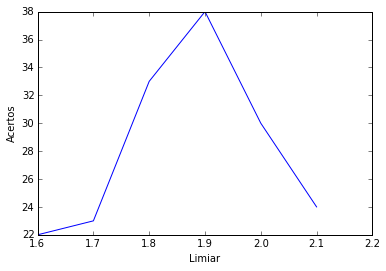

In [14]:
limiares = [] # limiares candidatos
respostas = []

# Limiares que serao testados
inicial = 1.6
passo = 0.1
final = 2.2

i = inicial

melhor_limiar = inicial
melhor_classificacao = 0

while i <= final :
    # Executar classificacao
    classificacao_volei = classificador_limiar(i, altura_volei);
    classificacao_futebol = classificador_limiar(i, altura_futebol);

    # Comparar resultados com gabarito
    resultados_volei = comparar_resultados(classificacao_volei, rotulos_volei);
    resultados_futebol = comparar_resultados(classificacao_futebol, rotulos_futebol);
    
    # Calcula o total de acertos e armazena o resultado
    res = resultados_volei[0] + resultados_futebol[0]
    respostas.append(res);
    limiares.append(i);
    
    # Verifica se consegui uma classificacao melhor
    if res > melhor_classificacao:
        melhor_classificacao = res
        melhor_limiar = i
    
    # Da mais um passo
    i += passo;
    
# Mostrar resultados e limiar de classificação
plt.figure();
plt.plot(limiares, respostas);
plt.ylabel('Acertos');
plt.xlabel('Limiar');

print "Melhor limiar:", melhor_limiar, " Acertos:", melhor_classificacao


O processo de busca exaustiva pode encontrar bons resultados, mas depende de calcular a função de classificação diversas vezes - tantas mais vezes quanto for fina a grade de busca. Assim, uma busca que garante resultados melhores será computacionalmente mais custosa. Isso pode torná-la inviável para diversos casos de aplicação, como trabalhos com *big data* ou com funções custosas como *mineração de bitcoin*.

Além disso, a busca exaustiva, quando executada sobre diversos parâmetros, deve levar em consideração uma grade de várias dimensões (e, por isso, é também chamado de *grid search*). Se temos $n$ dimensões, sendo que $k$ possibilidades de cada uma delas será testada, então a busca exaustiva deverá executar $k^n$ testes de uma função. Neste momento, é importante lembrar que $6 \times 10^{23}$ é um mol e que o número de átomos no universo é estimado na orde de $10^{200}$, ou seja, um *grid search* com mais que algumas poucas dimensões é computacionalmente infactível.

# Exercícios

1. Escreva, com suas palavras, o que significa "fronteira de decisão".
2. Justifique, com suas palavras e usando os dados do problema, o motivo pelo qual a altura parece uma característica mais relevante que o peso para a classificação de jogadores.
3. Modifique os programas propostos para que a classificação de jogadores seja feita usando o peso, e não a altura dos jogadores, e compare os resultados com os que obtivemos no processo de busca exaustiva.
4. Proponha uma outra característica que poderia ser usada no processo de classificação de jogadores e explique porque você espera que ela é relevante para o processo de classificação.
5. Proponha um problema de classificação à sua escolha e identifique algumas características dos elementos envolvidos que poderiam contribuir para o processo de classificação.